In [1]:
from extract.extract import getTLEsFromLaunches, getCredentials
from datetime import datetime
import seaborn as sns
from scipy.stats import iqr
sns.set_theme()
sns.color_palette("Spectral", as_cmap=True)

start = datetime(2022, 1, 1)
end = datetime(2023, 1, 1)

token = getCredentials(source="discos")
username, password = getCredentials(source="spacetrack")

launchIDs = ["2013-066", "2018-092", "2019-084", "2022-002"]
launchIDs = ["2013-066"]
# launchIDs = ["2022-002"]
# launchIDs = ["2019-084"]

# combining everything into one DF
discosDataDict, dfOriginal = getTLEsFromLaunches(
    username,
    password,
    token,
    launchIDs,
    start,
    end,
    combineDiscosAndTLE=True,
    collectLaunches=True,
    collectAllTLEs=True,
    forceRegen=False,
)


Launch: 2013-066:  67%|██████▋   | 20/30 [00:01<00:01,  7.78it/s]

Error in querySpacetrack: File is empty (status 200), may be API overload or deorbitted spacecraft., proceeding
Error in querySpacetrack: File is empty (status 200), may be API overload or deorbitted spacecraft., proceeding


Launch: 2013-066:  93%|█████████▎| 28/30 [00:04<00:00,  5.39it/s]

Error in querySpacetrack: File is empty (status 200), may be API overload or deorbitted spacecraft., proceeding


Launch: 2013-066: 100%|██████████| 30/30 [00:04<00:00,  7.20it/s]


Total failed: 3 -> [39435, 39436, 39437]
Consider adding these to the ignore list if this happens again
Skipped NORADid 39435
Skipped NORADid 39436
Skipped NORADid 39437


In [2]:
print(dfOriginal.columns)
df = dfOriginal.query("overallCovariance < 5").query("deltat< 10000")

colsToDrop = [
       'vimpelId', 'OBJECT_NAME', 'CENTER_NAME',
       'MEAN_MOTION', 'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE',
       'ARG_OF_PERICENTER', 'MEAN_ANOMALY', 'NORAD_CAT_ID', 'ELEMENT_SET_NO',
       'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT',
       'SEMIMAJOR_AXIS', 'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'OBJECT_TYPE',
       'RCS_SIZE', 'COUNTRY_CODE', 'LAUNCH_DATE', 'DECAY_DATE', 'TLE_LINE0',
       'TLE_LINE1', 'TLE_LINE2', 'TLE_LINE1min1', 'TLE_LINE2min1']

df = df.drop(colsToDrop, axis=1)
print(df.columns)

Index(['vimpelId', 'depth', 'name', 'cosparId', 'xSectAvg', 'shape', 'width',
       'xSectMax', 'height', 'diameter', 'xSectMin', 'mass', 'span', 'satno',
       'objectClass', 'OBJECT_NAME', 'CENTER_NAME', 'EPOCH', 'MEAN_MOTION',
       'ECCENTRICITY', 'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER',
       'MEAN_ANOMALY', 'NORAD_CAT_ID', 'ELEMENT_SET_NO', 'REV_AT_EPOCH',
       'BSTAR', 'MEAN_MOTION_DOT', 'MEAN_MOTION_DDOT', 'SEMIMAJOR_AXIS',
       'PERIOD', 'APOAPSIS', 'PERIAPSIS', 'OBJECT_TYPE', 'RCS_SIZE',
       'COUNTRY_CODE', 'LAUNCH_DATE', 'DECAY_DATE', 'TLE_LINE0', 'TLE_LINE1',
       'TLE_LINE2', 'TLE_LINE1min1', 'TLE_LINE2min1', 'deltat', 'errorX',
       'errorY', 'errorZ', 'overallCovariance'],
      dtype='object')
Index(['depth', 'name', 'cosparId', 'xSectAvg', 'shape', 'width', 'xSectMax',
       'height', 'diameter', 'xSectMin', 'mass', 'span', 'satno',
       'objectClass', 'EPOCH', 'deltat', 'errorX', 'errorY', 'errorZ',
       'overallCovariance'],
      dty

<AxesSubplot: xlabel='overallCovariance', ylabel='name'>

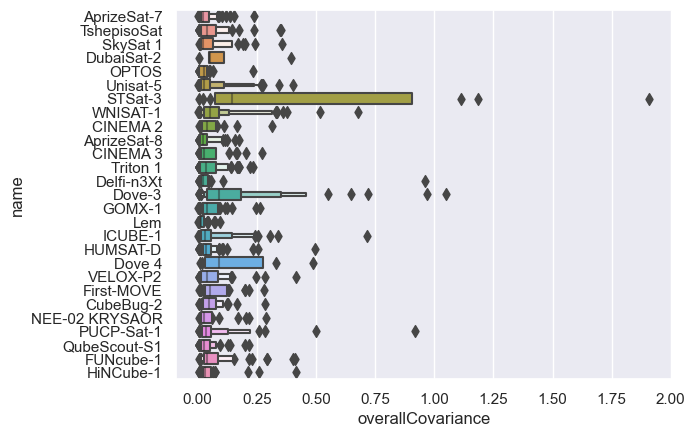

In [3]:
sns.boxenplot(x = df.overallCovariance, y = df.name)

<AxesSubplot: >

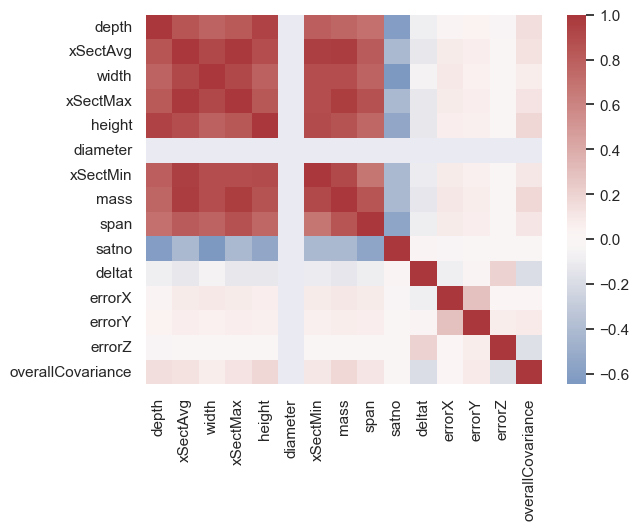

In [4]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, center=0, cmap="vlag")

<AxesSubplot: xlabel='overallCovariance', ylabel='Density'>

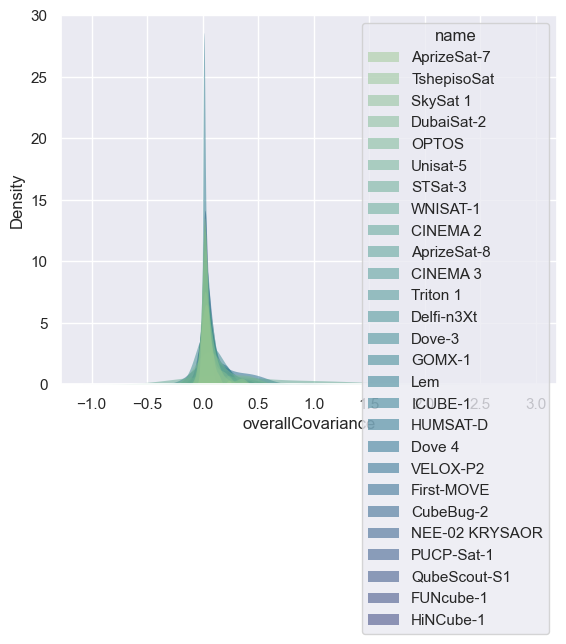

In [5]:
sns.kdeplot(
   data=df, x=df.overallCovariance, hue="name",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

<AxesSubplot: xlabel='EPOCH', ylabel='overallCovariance'>

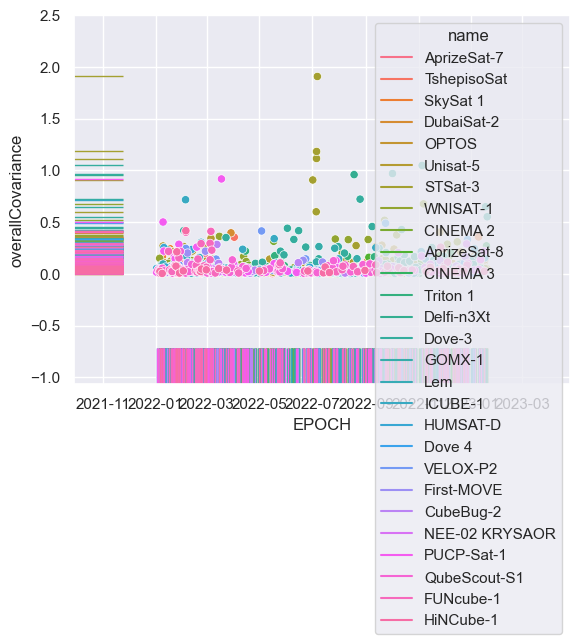

In [6]:
sns.scatterplot(x=df.EPOCH, y=df.overallCovariance, hue=df.name)
sns.rugplot(x=df.EPOCH, y=df.overallCovariance, height=.1, hue=df.name)

<AxesSubplot: xlabel='deltat', ylabel='overallCovariance'>

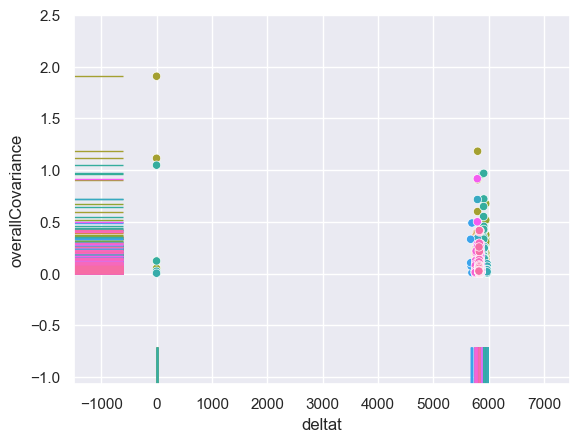

In [7]:
sns.scatterplot(x=df.deltat, y=df.overallCovariance, hue=df.name, legend=None)
sns.rugplot(x=df.deltat, y=df.overallCovariance, height=.1, hue=df.name, legend=None)

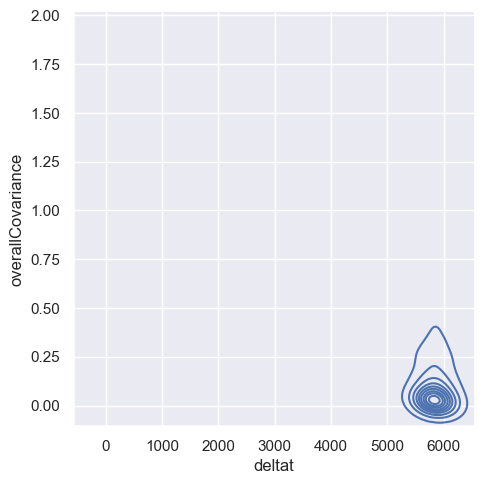

In [8]:
plot = sns.displot(x=(df.deltat), y=df.overallCovariance, kind="kde")


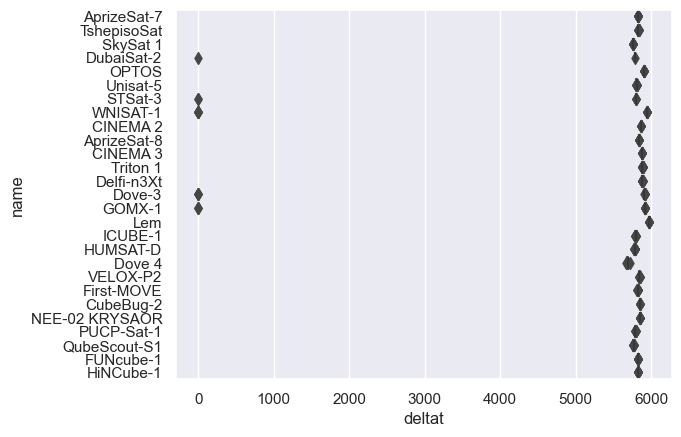

In [9]:
plot = sns.boxenplot(y=df.name, x=(df.deltat))

In [10]:
sns.scatterplot(x=df.errorRadial, y=df.errorCross, legend=None)
# sns.displot(x=df.errorRadial, y=df.errorCross, legend=None, kind="kde")

AttributeError: 'DataFrame' object has no attribute 'errorRadial'

In [ ]:
plot = sns.displot(x=df.overallCovariance, y=df.errorAlong, kind="kde")